In [287]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [289]:
# Reading the data into a dataframe
leads = pd.read_csv("leads.csv")

In [290]:
# Checking the dimensions of the data
leads.shape

(9240, 37)

In [291]:
# Checking the data distribution 
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [292]:
# Checking the datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [293]:
# Checking for column-wise null count
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [294]:
# The row-wsie null count
leads.isnull().sum(axis = 1)

0       1
1       1
2       0
3       0
4       0
5       9
6       0
7       9
8       6
9       5
10      0
11      1
12      0
13      1
14      2
15      0
16      9
17      0
18      2
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
       ..
9210    0
9211    0
9212    0
9213    6
9214    8
9215    6
9216    0
9217    1
9218    5
9219    0
9220    1
9221    4
9222    0
9223    0
9224    1
9225    0
9226    1
9227    0
9228    4
9229    0
9230    1
9231    0
9232    0
9233    5
9234    0
9235    0
9236    0
9237    0
9238    5
9239    0
Length: 9240, dtype: int64

In [295]:
# Checking for the percentage of nulls 
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [296]:
# Dropping the columns with more than 30% nulls
leads = leads.drop(['Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Tags'], axis = 1)

In [297]:
# Checking the shape now
leads.shape

(9240, 30)

In [298]:
# Dropping the duplicates and keeping the first if any
leads.drop_duplicates( keep = 'first', inplace = True)

In [299]:
# It seems there aren't any duplicates
leads.shape

(9240, 30)

In [300]:
# Checking the column-wise null percentages again
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [301]:
# Checking the head
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity          ...           \
0                   0.0  Page Visited on Website          ...            
1                   2.5             Email Opened          ...            
2                   2.0             Email Opened          ...            
3                   1.0              Unreachable          ...            
4                   1.0        Converted to Lead          ...            

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [302]:
# Removing the rows with nulls in the Lead Profile column
leads = leads[pd.notnull(leads['Lead Profile'])]

In [303]:
# Checking percentages
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.55
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.99
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.99
Last Activity                                     1.58
Country                                          24.58
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [304]:
# Dropping countries since it has a high value of nulls and is not deemed to be of predictive value
leads = leads.drop(['Country'], axis = 1)

In [305]:
# Checking the percentages
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.55
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.99
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.99
Last Activity                                    1.58
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [306]:
# Checking the shape
leads.shape

(6531, 29)

In [307]:
# Removing the rows with nulls in the 'Total Visits' column
leads = leads[pd.notnull(leads['TotalVisits'])]

In [308]:
# Checking the percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.45
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [309]:
# Checking the shape
leads.shape

(6401, 29)

In [310]:
# Removing the rows with nulls in the 'Lead Source column'
leads = leads[pd.notnull(leads['Lead Source'])]

In [311]:
# We now have a clean dataset
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [312]:
# Checking the shape of the dataset after cleaning
leads.shape

(6372, 29)

In [313]:
# Seeing the columns we are left with
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [314]:
leads['Magazine'].unique()

array(['No'], dtype=object)

In [315]:
leads['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

In [316]:
leads['Update me on Supply Chain Content'].unique()

array(['No'], dtype=object)

In [317]:
leads['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [318]:
leads['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

In [319]:
# Dropping all the columns with only 'No' in the rows as they have no value in prediction
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [320]:
# Checking the shape
leads.shape

(6372, 24)

In [321]:
# Checking the 'City' column
leads['City'].unique()

array(['Select', 'Mumbai', 'Other Metro Cities', 'Thane & Outskirts',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [322]:
# Since the 'City' column doesn't have much value, it has been dropped
leads = leads.drop(['City'], axis = 1)

In [323]:
# Coverting Yes/No to Binary variables in the relevant columns

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [324]:
# Checking the head of the dataframe
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity          ...            \
0                   0.0  Page Visited on Website          ...             
1                   2.5             Email Opened          ...             
2                   2.0             Email Opened          ...             
3                   1.0              Unreachable          ...             
4                   1.0        Converted to Lead          ...             

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects      0                 0   
1                       Better Career Prospects      0                 0   
2                       Better Career Prospects      0                 0   
3                       Better Career Prospects      0                 0   
4                       Better Career Prospects      0                 0   

  X Education Forums  Newspaper  Digital Advertisement  \
0                  0          0                      0   
1                  0          0                      0   
2                  0          0                      0   
3                  0          0                      0   
4                  0          0                      0   

   Through Recommendations    Lead Profile  \
0                        0          Select   
1                        0          Select   
2                        0  Potential Lead   
3                        0          Select   
4                        0          Select   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 23 columns]

In [325]:
# Checking the shape
leads.shape

(6372, 23)

In [326]:
# Feature standardization

df = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
normalized_df=(df-df.mean())/df.std()
leads = leads.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
leads = pd.concat([leads,normalized_df],axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

          ...          X Education Forums  Newspaper  Digital Advertisement  \
0         ...                           0          0                      0   
1         ...                           0          0                      0   
2         ...                           0          0                      0   
3         ...                           0          0                      0   
4         ...                           0          0                      0   

   Through Recommendations    Lead Profile  \
0                        0          Select   
1                        0          Select   
2                        0  Potential Lead   
3                        0          Select   
4                        0          Select   

   A free copy of Mastering The Interview  Last Notable Activity TotalVisits  \
0                                       0               Modified   -0.743304   
1                                       0           Email Opened    0.287140   
2                                       1           Email Opened   -0.331127   
3                                       0               Modified   -0.537215   
4                                       0               Modified   -0.331127   

   Total Time Spent on Website Page Views Per Visit  
0                    -0.946723            -1.144584  
1                     0.245349             0.009433  
2                     1.762852            -0.221371  
3                    -0.407284            -0.682978  
4                     1.578913            -0.682978  

[5 rows x 23 columns]

In [327]:
# Creating dummy variables for some of the columns
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity']], drop_first=True)

# Adding dummies to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [328]:
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                    ...                    Last Activity_Email Received  \
0                   ...                                               0   
1                   ...                                               0   
2                   ...                                               0   
3                   ...                                               0   
4                   ...                                               0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable Last Activity_Unsubscribed  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   Last Activity_View in browser link Clicked  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  Last Activity_Visited Booth in Tradeshow  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 56 columns]

In [329]:
dummy2 = pd.get_dummies(leads[['Specialization']], drop_first=True)
leads = pd.concat([leads, dummy2], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                 ...                Specialization_International Business  \
0                ...                                                    0   
1                ...                                                    0   
2                ...                                                    0   
3                ...                                                    0   
4                ...                                                    0   

   Specialization_Marketing Management  Specialization_Media and Advertising  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     1   
4                                    0                                     0   

   Specialization_Operations Management  Specialization_Retail Management  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   Specialization_Rural and Agribusiness  Specialization_Select  \
0                                      0                      1   
1                                      0                      1   
2                                      0                      0   
3                                      0                      0   
4                                      0                      1   

  Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

  Specialization_Travel and Tourism  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  

[5 rows x 74 columns]

In [330]:
dummy3 = pd.get_dummies(leads[['How did you hear about X Education']], drop_first=True)
leads = pd.concat([leads, dummy3], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                        ...                         \
0                       ...                          
1                       ...                          
2                       ...                          
3                       ...                          
4                       ...                          

  Specialization_Travel and Tourism  How did you hear about X Education_Email  \
0                                 0                                         0   
1                                 0                                         0   
2                                 0                                         0   
3                                 0                                         0   
4                                 0                                         0   

   How did you hear about X Education_Multiple Sources  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   How did you hear about X Education_Other  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   How did you hear about X Education_SMS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   How did you hear about X Education_Select  \
0                                          1   
1                                          1   
2                                          1   
3                                          0   
4                                          0   

  How did you hear about X Education_Social Media  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  

In [331]:
dummy4 = pd.get_dummies(leads[['What is your current occupation']], drop_first=True)
leads = pd.concat([leads, dummy4], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                          ...                           \
0                         ...                            
1                         ...                            
2                         ...                            
3                         ...                            
4                         ...                            

  How did you hear about X Education_SMS  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   How did you hear about X Education_Select  \
0                                          1   
1                                          1   
2                                          1   
3                                          0   
4                                          0   

   How did you hear about X Education_Social Media  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   How did you hear about X Education_Student of SomeSchool  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   How did you hear about X Education_Word Of Mouth  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

  What is your current occupation_Student  \
0                                       0   
1                                       0   
2                            

In [332]:
dummy5 = pd.get_dummies(leads[['What matters most to you in choosing a course']], drop_first=True)
leads = pd.concat([leads, dummy5], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                          ...                          \
0                         ...                           
1                         ...                           
2                         ...                           
3                         ...                           
4                         ...                           

  How did you hear about X Education_Social Media  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   How did you hear about X Education_Student of SomeSchool  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   How did you hear about X Education_Word Of Mouth  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

  What is your current occupation_Working Professional  \
0                                                  0     
1                                         

In [333]:
dummy6 = pd.get_dummies(leads[['Last Notable Activity']], drop_first=True)
leads = pd.concat([leads, dummy6], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

  Last Notable Activity_Email Opened  Last Notable Activity_Email Received  \
0                                  0                                     0   
1                                  1                                     0   
2                                  1                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

  Last N

In [334]:
dummy7 = pd.get_dummies(leads[['Lead Profile']], drop_first=True)
leads = pd.concat([leads, dummy7], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted            Last Activity           Specialization  \
0            0          0  Page Visited on Website                   Select   
1            0          0             Email Opened                   Select   
2            0          1             Email Opened  Business Administration   
3            0          0              Unreachable    Media and Advertising   
4            0          1        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                 ...                  \
0                ...                   
1                ...                   
2                ...                   
3                ...                   
4                ...                   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Lead Profile_Lateral Student  Lead Profile_Other Leads  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

  Lead Profile_Potential Lead  Lead Profile_Select  \
0                           0                    1   
1                           0                    1   
2                           1                    0   
3                           0                    1   
4                           0                    1   

  Lead Profile_Student of SomeSchool  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 108 columns]

In [335]:
#Dropping columns for which dummy variables were created

leads = leads.drop(['Lead Profile','Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'], 1)

In [336]:
# Checking the shape after creation of dummie variables
leads.shape

(6372, 99)

In [337]:
leads.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'L

In [338]:
#Deleting columns with select as they are not useful for analysis

leads = leads.loc[:, ~leads.columns.str.contains('_Select')]


In [340]:
leads.shape

(6372, 96)

In [341]:
#Checking for outliers in continuous variables
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  6.372000e+03                 6.372000e+03          6.372000e+03
mean   2.122526e-16                -3.851631e-16          1.244850e-15
std    1.000000e+00                 1.000000e+00          1.000000e+00
min   -7.433044e-01                -9.467227e-01         -1.144584e+00
25%   -5.372155e-01                -8.865885e-01         -6.829776e-01
50%   -1.250376e-01                -4.391195e-01         -2.213707e-01
75%    2.871402e-01                 8.612820e-01          4.710397e-01
90%    9.054070e-01                 1.580504e+00          1.163450e+00
95%    1.317585e+00                 1.869767e+00          1.625057e+00
99%    2.819973e+00                 2.324028e+00          3.009878e+00
max    5.098502e+01                 3.071655e+00          2.424380e+01

In [ ]:
# As can be seen, the values are steadily rising and therefore we don't have to deal with outliers 

In [342]:
# Checking the overall percentage of conversion
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

48.10106716886378

In [ ]:
# Splitting the data into the test and train set to build the model

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  Do Not Call  Search  Newspaper Article  X Education Forums  \
0             0            0       0                  0                   0   
1             0            0       0                  0                   0   
2             0            0       0                  0                   0   
3             0            0       0                  0                   0   
4             0            0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   A free copy of Mastering The Interview  TotalVisits  \
0                                       0    -0.743304   
1                                       0     0.287140   
2                                       1    -0.331127   
3                                       0    -0.537215   
4                                       0    -0.331127   

                  ...                  \
0                 ...                   
1                 ...                   
2                 ...                   
3                 ...                   
4                 ...                   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Lead Profile_Lateral Student  Lead Profile_Other Leads  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  
0                            0                                   0  
1                            0                                   0  
2                            1                                   0  
3                            0                                   0  
4                            0                                   0  

[5 rows x 94 columns]

In [345]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [346]:
# Splitting the data into train and test with 70% of rows for the train set and 30% of the rows to the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [347]:
# Running the model 

import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())

logm1.fit().summary()

C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ayush\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\ayush\Anaconda3\lib\site-packages\

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4371
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        17:19:59   Pearson chi2:                 4.63e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.997e+14   8.46e+07   2.36e+06      0.000       2e+14       2e+14
Do Not Email                                                            -4.095e+14    5.5e+06  -7.45e+07      0.000   -4.09e+14   -4.09e+14
Do Not Call                                                              1.105e+15   6.78e+07   1.63e+07      0.000    1.11e+15    1.11e+15
Search                                                                   7.291e+13   3.09e+07   2.36e+06      0.000    7.29e+13    7.29e+13
Newspaper Article                                                        -174.5167   2.31e-06  -7.54e+07      0.000    -174.517    -174.517
X Education Forums                                                         23.0459   5.55e-07   4.15e+07      0.000      23.046      23.046
Newspaper                                                                  53.7667   1.46e-06   3.68e+07      0.000      53.767      53.767
Digital Advertisement                                                    -3.76e+15   4.78e+07  -7.87e+07      0.000   -3.76e+15   -3.76e+15
Through Recommendations                                                  2.418e+15    3.1e+07   7.81e+07      0.000    2.42e+15    2.42e+15
A free copy of Mastering The Interview                                   2.045e+14   3.64e+06   5.62e+07      0.000    2.04e+14    2.04e+14
TotalVisits                                                               1.39e+14   1.09e+06   1.27e+08      0.000    1.39e+14    1.39e+14
Total Time Spent on Website                                              3.728e+14   1.18e+06   3.16e+08      0.000    3.73e+14    3.73e+14
Page Views Per Visit                                                        -7e+13   1.54e+06  -4.54e+07      0.000      -7e+13      -7e+13
Lead Origin_Landing Page Submission                                     -2.228e+14    4.3e+06  -5.18e+07      0.000   -2.23e+14   -2.23e+14
Lead Origin_Lead Add Form                                               -5.392e+14   3.94e+07  -1.37e+07      0.000   -5.39e+14   -5.39e+14
Lead Origin_Lead Import                                                  6.118e+15   6.97e+07   8.77e+07      0.000    6.12e+15    6.12e+15
Lead Source_Direct Traffic                                               5.673e+15   7.81e+07   7.26e+07      0.000    5.67e+15    5.67e+15
Lead Source_Facebook                                                     8.216e+14   1.03e+08   7.96e+06      0.000    8.22e+14    8.22e+14
Lead Source_Google                                                        5.74e+15   7.81e+07   7.35e+07      0.000    5.74e+15    5.74e+15
Lead Source_Live Chat                                                    1.049e+16

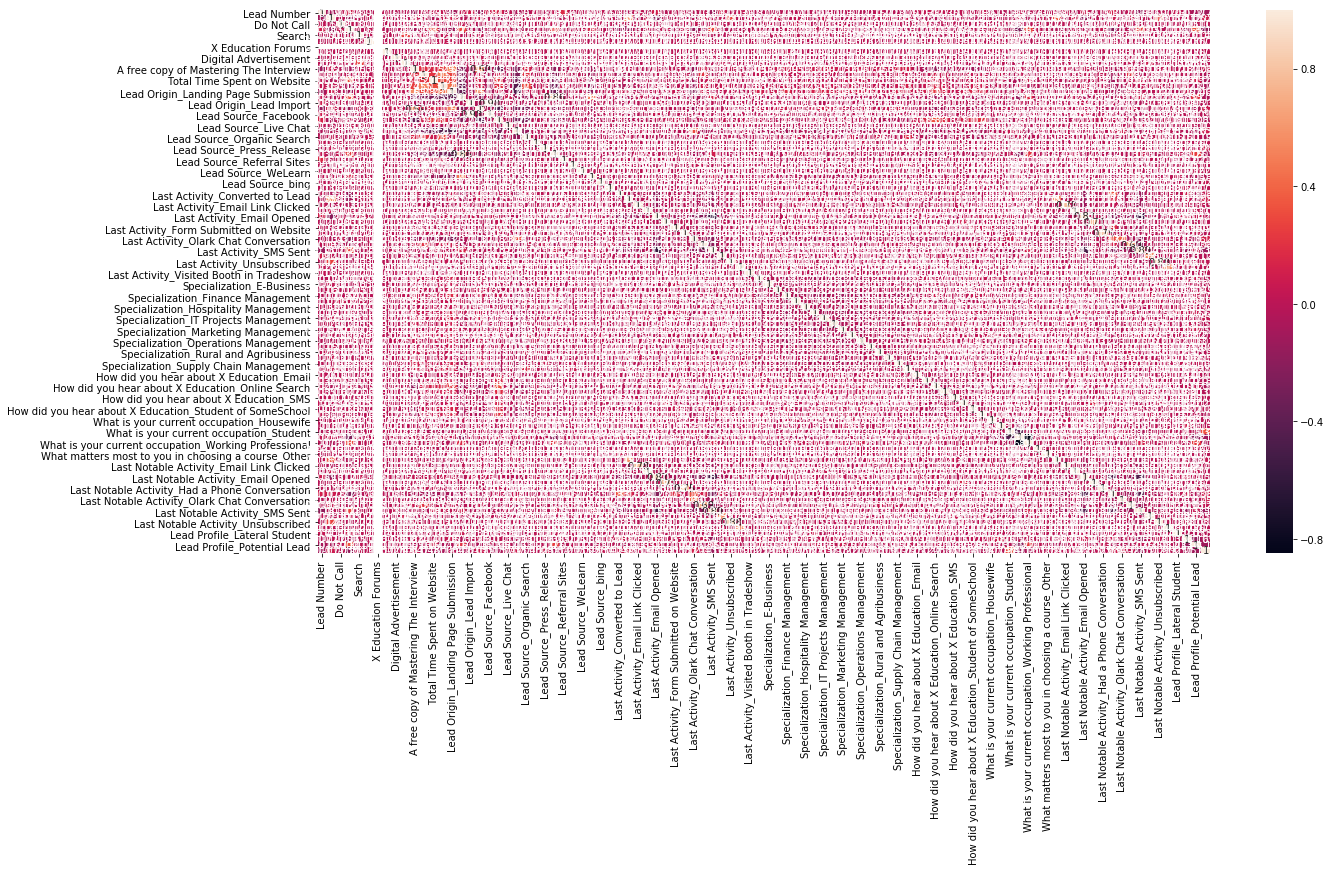

In [348]:
#PLotting the heatmap to see if correlations can be revealed

plt.figure(figsize = (20,10)) 
sns.heatmap(leads.corr(),annot = True)

In [ ]:
# Unfortunately due to the large number of variables, the heatmap does not tell us much
# We will therefore use the help of RFE to arrive at the most useful variables to build the model

In [379]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)    

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[ True False False False False False False False False False  True False
 False  True False False False False False  True False False False False
 False False False  True False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True False False False False False False False  True  True
 False False False  True False False  True False  True  True]
[ 1 10 20  8 80  7 36 14 74 41  1 43 34  1 32 15 33 18 35  1 17 53 79  2
 19 39 68  1 54 37 11  4 29 45 75 60 38  1  5 30  1 66 59 42 69 76 55 50
 51 49 12 67 44 71 47 70 48 13 16 46 52 56 25 21 64 65 27 61 63 62  1 77
  9  6  1 26 73  3 22 57 24 72  1  1 28 23 58  1 78 40  1 31  1  1]


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [380]:
# Variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [386]:
# After repeated RFE runs, we found that removing these columns gave us an optimal result since they had very high P-values.
# Doing this brought down the VIF values for all the other variables
col = col.drop('Last Notable Activity_Unreachable',1)

In [381]:
# Re-running RFE
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [382]:
# Re-running RFE
col = col.drop('What is your current occupation_Housewife',1)

In [383]:
col = col.drop('Lead Profile_Lateral Student')

In [361]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('Search', False, 20),
 ('Newspaper Article', False, 8),
 ('X Education Forums', False, 80),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 36),
 ('Through Recommendations', False, 14),
 ('A free copy of Mastering The Interview', False, 74),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 53),
 ('Lead Source_Press_Release', False, 79),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', F

In [387]:
# Let's run the model using the RFE selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [388]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1911.5
Date:                Sun, 03 Mar 2019   Deviance:                       3823.0
Time:                        17:32:43   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0140      0.068    -14.829      0.000      -1.148      -0.880
Do Not Email                                            -1.2130      0.194     -6.267      0.000      -1.592      -0.834
Total Time Spent on Website                              1.1028      0.048     22.752      0.000       1.008       1.198
Lead Origin_Lead Add Form                                3.2685      0.239     13.680      0.000       2.800       3.737
Lead Source_Olark Chat                                   1.4840      0.120     12.379      0.000       1.249       1.719
Lead Source_Welingak Website                             2.9581      1.034      2.861      0.004       0.932       4.984
Last Activity_Had a Phone Conversation                   2.5898      0.821      3.153      0.002       0.980       4.199
Last Activity_SMS Sent                                   0.9353      0.087     10.788      0.000       0.765       1.105
What is your current occupation_Working Professional     2.2651      0.199     11.403      0.000       1.876       2.654
Last Notable Activity_Modified                          -0.9612      0.094    -10.192      0.000      -1.146      -0.776
Lead Profile_Potential Lead                              1.4932      0.101     14.726      0.000       1.294       1.692
Lead Profile_Student of SomeSchool                      -3.1248      0.614     -5.089      0.000      -4.328      -1.921
========================================================================================================================
"""

In [ ]:
# Now all P=values for the 11 variables are below 0.05 and we can be satisfied

In [389]:
# Checking the VIFs for multicolinearity between selected variables
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame()
vif_df['features']=X_train[col].columns
vif_df['VIF']=[vif(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif_df['VIF']=round(vif_df['VIF'],2)
vif_df.sort_values(by='VIF',ascending=False,inplace=True)
vif_df

features   VIF
2                           Lead Origin_Lead Add Form  1.76
9                         Lead Profile_Potential Lead  1.41
4                        Lead Source_Welingak Website  1.35
1                         Total Time Spent on Website  1.29
6                              Last Activity_SMS Sent  1.29
3                              Lead Source_Olark Chat  1.25
7   What is your current occupation_Working Profes...  1.24
8                      Last Notable Activity_Modified  1.18
0                                        Do Not Email  1.07
10                 Lead Profile_Student of SomeSchool  1.06
5              Last Activity_Had a Phone Conversation  1.01

In [ ]:
# Since all the VIF values are below 2, we can be absolutely sure that multi-colinearity is not an issue here

In [ ]:
# Adding the model to the test set 

In [390]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.434107
1  0.126874
2  0.671418
3  0.714885
4  0.770389

In [391]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
8402          1
8782          0
6199          1
6482          1
6026          1

In [392]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


Lead Number  Converted  Converted_Prob
0         8402          1        0.434107
1         8782          0        0.126874
2         6199          1        0.671418
3         6482          1        0.714885
4         6026          1        0.770389

In [ ]:
# Finding the optimal cut-off point for probability

In [393]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

Lead Number  Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         8402          1        0.434107    1    1    1    1    1    0    0   
1         8782          0        0.126874    1    1    0    0    0    0    0   
2         6199          1        0.671418    1    1    1    1    1    1    1   
3         6482          1        0.714885    1    1    1    1    1    1    1   
4         6026          1        0.770389    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    1    0    0

In [394]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.483264  1.000000  0.000000
0.1   0.1  0.614017  0.985931  0.266194
0.2   0.2  0.742678  0.945887  0.552632
0.3   0.3  0.781904  0.902597  0.669028
0.4   0.4  0.793410  0.820346  0.768219
0.5   0.5  0.797071  0.764069  0.827935
0.6   0.6  0.781904  0.679654  0.877530
0.7   0.7  0.773013  0.614719  0.921053
0.8   0.8  0.739017  0.495671  0.966599
0.9   0.9  0.662657  0.316017  0.986842


In [395]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
# It appears from the graph that the optimal point is around 0.45
# We will therefore use this as the cut-off point

In [403]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.45 else 0)
# Let's see the head
y_pred_final.head()

Lead Number  Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         8402          1        0.434107    1    1    1    1    1    0    0   
1         8782          0        0.126874    1    1    0    0    0    0    0   
2         6199          1        0.671418    1    1    1    1    1    1    1   
3         6482          1        0.714885    1    1    1    1    1    1    1   
4         6026          1        0.770389    1    1    1    1    1    1    1   

   0.7  0.8  0.9  predicted  Lead Score  
0    0    0    0          0          43  
1    0    0    0          0          13  
2    0    0    0          1          67  
3    1    0    0          1          71  
4    1    0    0          1          77

In [404]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map( lambda x: round(100*(x)))
y_pred_final.head()

Lead Number  Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         8402          1        0.434107    1    1    1    1    1    0    0   
1         8782          0        0.126874    1    1    0    0    0    0    0   
2         6199          1        0.671418    1    1    1    1    1    1    1   
3         6482          1        0.714885    1    1    1    1    1    1    1   
4         6026          1        0.770389    1    1    1    1    1    1    1   

   0.7  0.8  0.9  predicted  Lead Score  
0    0    0    0          0          43  
1    0    0    0          0          13  
2    0    0    0          1          67  
3    1    0    0          1          71  
4    1    0    0          1          77

In [ ]:
# Model Evaluation 
# We will now evaluate the model's efficiency 

In [405]:
from sklearn import metrics

In [406]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[788, 200],
       [195, 729]], dtype=int64)

In [407]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7934100418410042

In [ ]:
# We get an overall accuracy of ~0.8 which satisfies the requirements 

In [408]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [409]:
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

(array([0.        , 0.20242915, 1.        ]),
 array([0.        , 0.78896104, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [410]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_Prob))

'0.89'

In [ ]:
# A final AUG of around 0.89 is a very good indicator of the model's predictive capacity

In [86]:
# Assigning the Lead Scores

In [411]:
# Predicted probabilities
y_pred_train = logsk.predict_proba(X_train[col])
# Converting y_pred to a dataframe which is an array
y_pred_train_df = pd.DataFrame(y_pred_train)
# Converting to column dataframe
y_pred_train_1 = y_pred_train_df.iloc[:,[1]]
# Let's see the head
y_pred_train_1.head()

1
0  0.665800
1  0.582555
2  0.360310
3  0.089404
4  0.091490

In [412]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

Converted
4170          1
6812          1
7717          1
207           0
2044          0

In [413]:
# Merging the dataframes
y_train_df['Lead Number'] = y_train_df.index
y_pred_train_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
y_pred_final_train = pd.concat([y_train_df,y_pred_train_1],axis=1)
y_pred_final_train= y_pred_final_train.rename(columns={ 1 : 'Converted_Prob'})
y_pred_final_train = y_pred_final_train.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)
y_pred_final_train.head()

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  import sys


Lead Number  Converted  Converted_Prob
0         4170          1        0.665800
1         6812          1        0.582555
2         7717          1        0.360310
3          207          0        0.089404
4         2044          0        0.091490

In [414]:
# Calculating and assigning Lead Scores 
y_pred_final_train['Lead Score'] = y_pred_final_train.Converted_Prob.map( lambda x: round(100*(x)))
y_pred_final_train.head()

Lead Number  Converted  Converted_Prob  Lead Score
0         4170          1        0.665800          67
1         6812          1        0.582555          58
2         7717          1        0.360310          36
3          207          0        0.089404           9
4         2044          0        0.091490           9

In [415]:
Total_Lead_Scores = pd.concat([y_pred_final_train,y_pred_final])
Total_Lead_Scores = Total_Lead_Scores[['Lead Number','Lead Score']]
Total_Lead_Scores.head()

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Lead Number  Lead Score
0         4170          67
1         6812          58
2         7717          36
3          207           9
4         2044           9

In [416]:
# Final Table with lead Scores and Lead Number
Total_Lead_Scores

Lead Number  Lead Score
0            4170          67
1            6812          58
2            7717          36
3             207           9
4            2044           9
5            3330          90
6            6498           0
7            2085          98
8            6260           1
9              19           6
10           4647           3
11           5380           2
12           9217          86
13           5132          15
14           6372          57
15            983          56
16           3542          99
17           1267          86
18           3508           5
19           8927          89
20           6054          48
21           2628          13
22           5186          50
23           6792          99
24           2686         100
25            175           7
26           2443          90
27           3983          99
28           2028          18
29           6592           1
...           ...         ...
1882         5406          16
1883         5330          73
1884         5461          75
1885         7979          71
1886         4447          26
1887          533          86
1888          848          85
1889         7545           1
1890         8630          51
1891         7824           7
1892         5663          25
1893         5536          59
1894         1721          91
1895         4853          29
1896         8608          65
1897         8787          99
1898         2189          35
1899         4884          25
1900         6472          48
1901         8744          19
1902         6837          17
1903         1558          98
1904         1332          94
1905         8824          83
1906         6583          39
1907         5528           6
1908         3055          79
1909         7220          75
1910         5135          87
1911          218           7

[6372 rows x 2 columns]

In [418]:
# Making sure that none of the lead scores have gone below zero or above 100
Total_Lead_Scores['Lead Score'].unique()

array([ 67,  58,  36,   9,  90,   0,  98,   1,   6,   3,   2,  86,  15,
        57,  56,  99,   5,  89,  48,  13,  50, 100,   7,  18,  10,  40,
        79,  32,  12,  24,  83,  87,  59,  49,  95,  25,  54,  11,  22,
        73,  74,  75,  20,  63,  71,  44,  80,  37,  29,  55,  14,  72,
        38,  66,  42,  62,  96,  33,  94,  68,  78,   4,  84,  60,  82,
        47,  97,  31,  93,  85,  35,  28,  69,  77,  64,  30,  81,  70,
        34,  16,  41,  17,  61,  88,  19,  21,  92,  76,  26,  51,  53,
         8,  65,  23,  52,  27,  43,  45,  39,  91,  46], dtype=int64)